# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Minimising error measure
using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4.91e+07   0:00.0
1     12     3.57e+07   0:00.0
2     18     3.57e+07   0:00.0
3     24     2.01e+07   0:00.0
20    126    3488476    0:00.0
40    246    1065775    0:00.0
60    366    201465.9   0:00.0
80    486    142436.4   0:00.1
100   606    142436.4   0:00.1
120   726    142436.4   0:00.1
140   846    142436.4   0:00.1
160   966    142436.4   0:00.1
180   1086   142436.4   0:00.1
200   1206   142436.4   0:00.1
220   1326   142436.4   0:00.2
240   1446   142436.4   0:00.2
260   1566   136691.4   0:00.2
280   1686   132121.1   0:00.2
300   1806   109799.3   0:00.2
320   1926   109799.3   0:00.2
340   2046   109799.3   0:00.3
360   2166   109799.3   0:00.3
380   2286   105261     0:00.3
400   2406   105261     0:00.3
420   2526   105261     0:00.3
440   2646   105261     0:00.3
460   2766   105261     0:00.3
480   2886   105261 

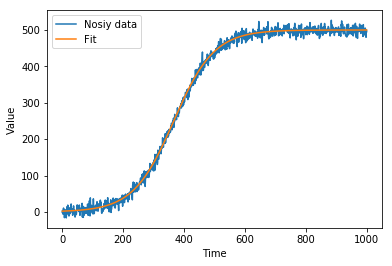

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()